In [1]:
from tensorflow.keras.datasets import mnist 
import numpy as np
  
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255 
  
train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)
  
train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

In [2]:
from tensorflow import keras 
from tensorflow.keras import layers
  
def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model
model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)
  
model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 4s 10ms/step - loss: 1.0799 - accuracy: 0.6961 - val_loss: 0.2469 - val_accuracy: 0.9252
Epoch 2/10
375/375 [==============================] - 3s 7ms/step - loss: 0.2772 - accuracy: 0.9135 - val_loss: 0.2068 - val_accuracy: 0.9333
Epoch 3/10
375/375 [==============================] - 3s 8ms/step - loss: 0.1713 - accuracy: 0.9456 - val_loss: 0.1770 - val_accuracy: 0.9474
Epoch 4/10
375/375 [==============================] - 3s 8ms/step - loss: 0.1200 - accuracy: 0.9598 - val_loss: 0.1593 - val_accuracy: 0.9545
Epoch 5/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0862 - accuracy: 0.9723 - val_loss: 0.1792 - val_accuracy: 0.9473
Epoch 6/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0645 - accuracy: 0.9801 - val_loss: 0.1136 - val_accuracy: 0.9670
Epoch 7/10
375/375 [==============================] - 3s 8ms/step - loss: 0.0461 - accuracy: 0.9851 - val_loss: 0.1452 - val_accuracy: 0.9620
Epoch

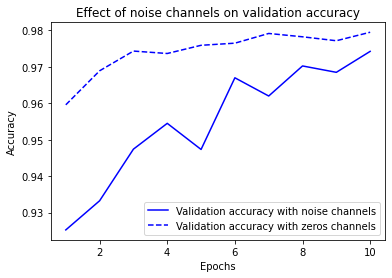

In [3]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()